 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [75]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [76]:
# Using Pathlib to set CSV file path
whale_returns = Path("Resources/whale_returns.csv")

In [77]:
#reading and converting the dates to DateTimeIndex
whale_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_values("Date", ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [78]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [79]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [80]:
# Drop nulls
whale_df = whale_df.dropna().copy()

#confirming the results
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [81]:
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [82]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_values("Date", ascending=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [83]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [84]:
# Drop nulls
algo_df = algo_df.dropna().copy()

In [85]:
#confirming the results
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [86]:
algo_df.head(5)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [87]:
# Reading S&P TSX 60 Closing Prices
sp_path = Path("Resources/sp_tsx_history.csv")
sp_df = pd.read_csv(sp_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_df.sort_values("Date", ascending=True)
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [88]:
# Check Data Types
sp_df["Close"].dtype

dtype('O')

In [89]:
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [90]:
# Fix Data Types
sp_df["Close"] = sp_df["Close"].str.replace("$","")
sp_df["Close"] = sp_df["Close"].str.replace(",","") 
sp_df["Close"] = sp_df["Close"].str.replace("%","") 
#sp_df["Close"] = sp_df["Close"].str.replace(r"\D+", regex=True)
sp_df.head()

C:\Users\EbadS\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [91]:
sp_df.dtypes

Close    object
dtype: object

In [92]:
sp_df["Close"] = sp_df["Close"].astype("float")
sp_df["Close"].dtypes

dtype('float64')

In [93]:
# Calculate Daily Returns
sp_df_daily_returns = sp_df.pct_change()
sp_df_daily_returns.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608


In [94]:
# Drop nulls
sp_df_daily_returns.dropna()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [95]:
#confirming the results
sp_df_daily_returns.isnull().sum()

Close    1
dtype: int64

In [96]:
# Rename `Close` Column to be specific to this portfolio.
sp_df_daily_returns.columns = ["S&P TSX 60"]
sp_df_daily_returns

,S&P TSX 60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [97]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_daily_returns = pd.concat([whale_df, algo_df, sp_df_daily_returns], axis="columns", join="inner")
joined_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

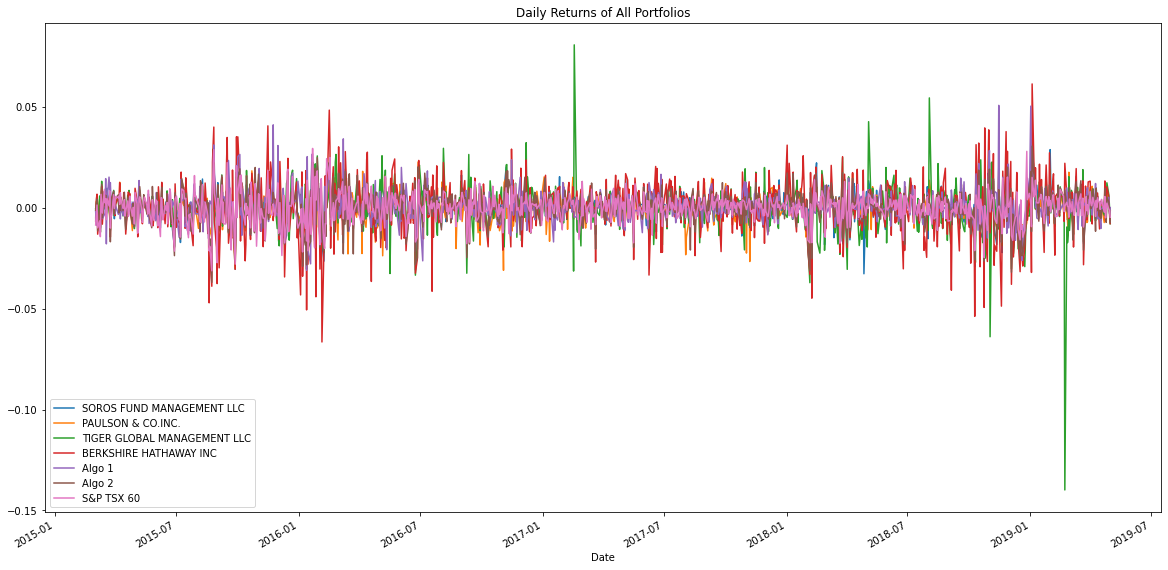

In [98]:
# Plot daily returns of all portfolios
joined_daily_returns.plot(figsize=(20,10), title = "Daily Returns of All Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'All Portfolios Cumulative Returns'}, xlabel='Date'>

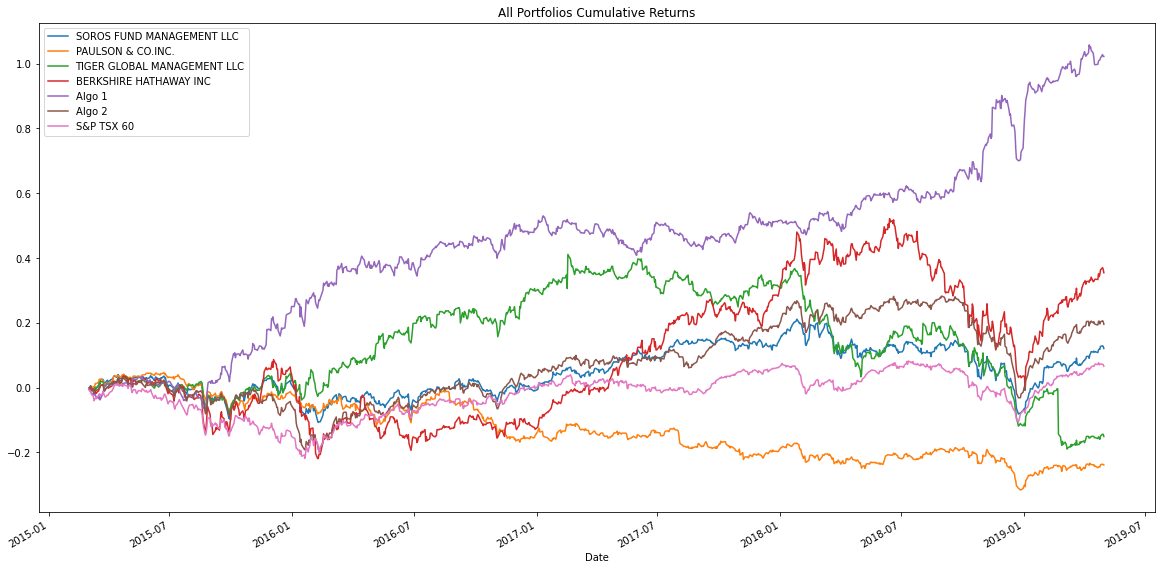

In [99]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_daily_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="All Portfolios Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

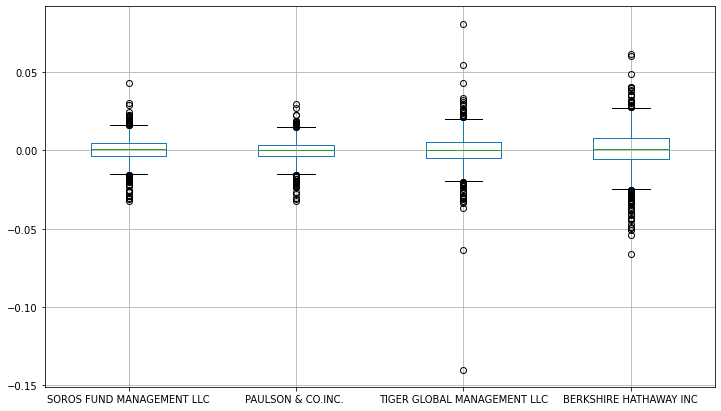

In [100]:
# Box plot to visually show risk for Whale_df
whale_df.boxplot(figsize=(12, 7))

<AxesSubplot:>

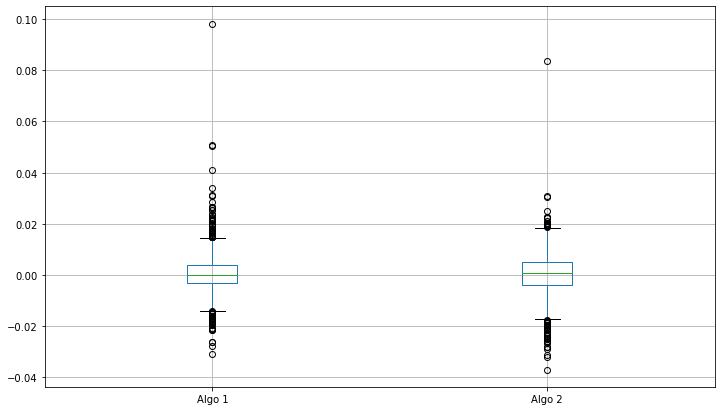

In [101]:
# Box plot to visually show risk for algo_df
algo_df.boxplot(figsize=(12,7))

<AxesSubplot:>

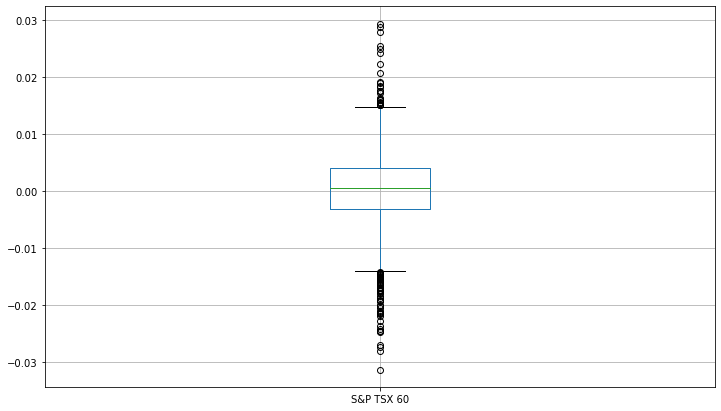

In [102]:
# Box plot to visually show risk for sp_df_daily_returns
sp_df_daily_returns.boxplot(figsize=(12,7))

### Calculate Standard Deviations

In [103]:
# Calculate the daily standard deviations of all portfolios
#std deviation for whale_df
whale_df.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [104]:
#combine column data to detrmine std deviation of portfolio
whale_commbined = whale_df.stack().std()
whale_commbined

0.009899249920100077

In [105]:
#std deviation for algo_df
algo_df.std()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [106]:
#combine column data to detrmine std deviation of portfolio
algo_combined = algo_df.stack().std()
algo_combined

0.008230393528266024

In [107]:
#std deviation for sp_df
sp_df_daily_returns.std()

S&P TSX 60    0.006637
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [108]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_combined = sp_df_daily_returns.stack().std()
 
# Determine which portfolios are riskier than the S&P TSX 60
if whale_commbined > sp_combined :
    print("Whale portfolio is riskier than S&P TSX 60") 
if algo_combined > sp_combined : 
    print("Algorithmic portfolio is riskier than S&P TSX 60")


Whale portfolio is riskier than S&P TSX 60
Algorithmic portfolio is riskier than S&P TSX 60


### Calculate the Annualized Standard Deviation

In [109]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_deviation = joined_daily_returns.std() * np.sqrt(252)
annual_std_deviation

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [110]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
#Rolling std deviation for joined_daily_returns 
joined_daily_returns_roll = joined_daily_returns.rolling(window=21).std()
joined_daily_returns_roll

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:title={'center':'Joined Daily Returns Std Deviation Plot'}, xlabel='Date'>

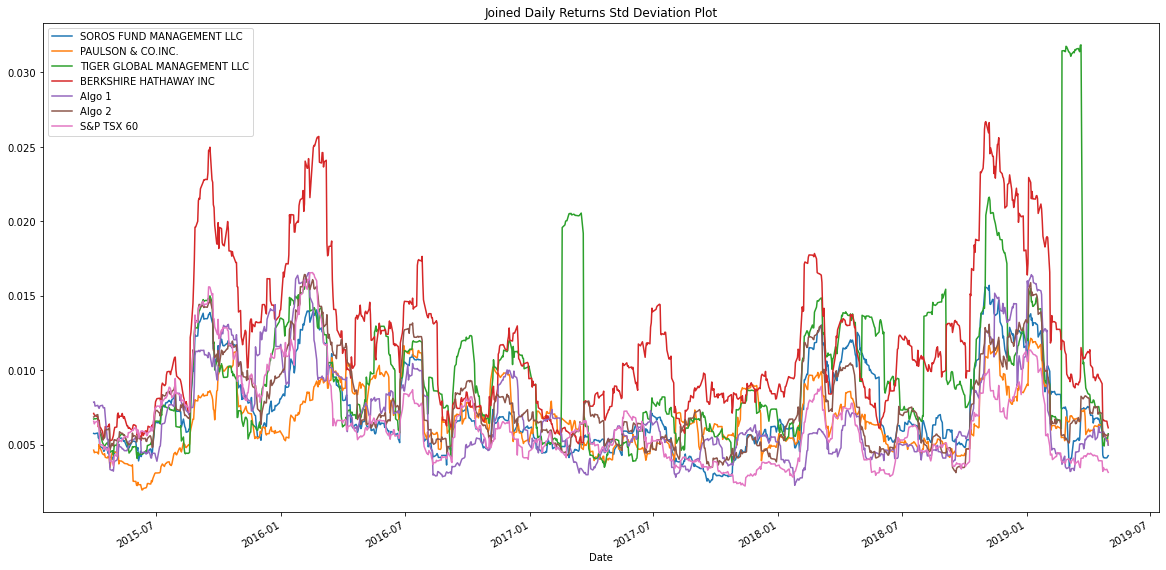

In [111]:
# Plot Rolling std deviation for joined_daily_returns 
joined_daily_returns_roll.plot(figsize=(20,10), title="Joined Daily Returns Std Deviation Plot")

In [112]:
#Rolling std deviation for whale_df 
whale_roll = whale_df.rolling(window=21).std()
whale_roll

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641
2019-04-26,0.004117,0.005649,0.005424,0.006599
2019-04-29,0.004123,0.005374,0.005438,0.006584


<AxesSubplot:title={'center':'Whale Portfolio 21-day Standard Deviation Plot'}, xlabel='Date'>

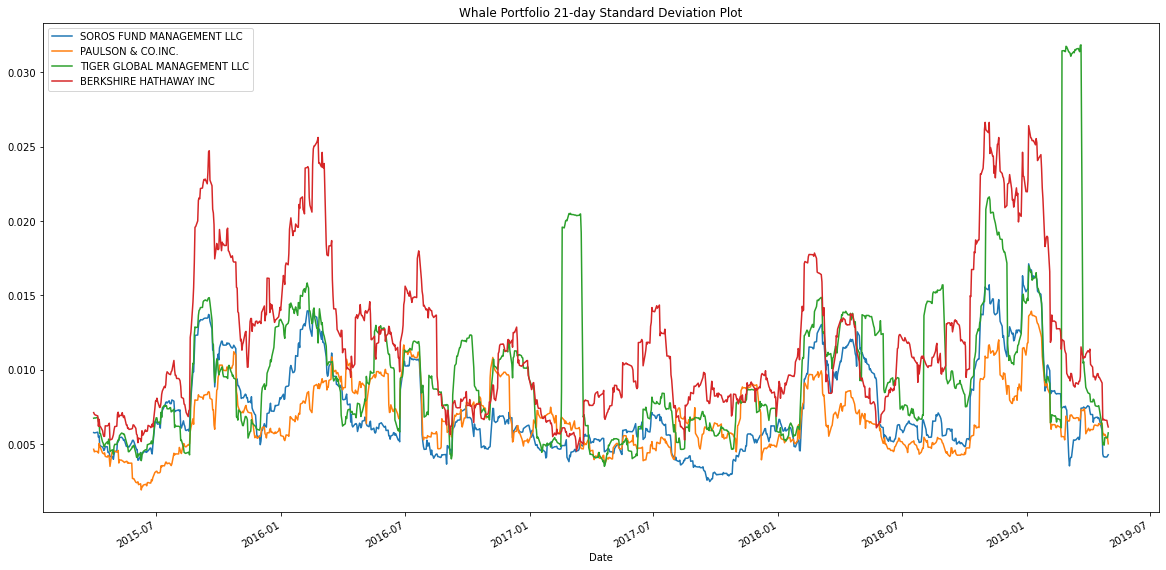

In [113]:
#plot Rolling std deviation for whale_df  
whale_roll.plot(figsize=(20,10), title="Whale Portfolio 21-day Standard Deviation Plot")

In [114]:
#Rolling std deviation for algo_df
algo_df_roll = algo_df.rolling(window=21).std()
algo_df_roll

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,NaN,NaN
2014-06-09,NaN,NaN
2014-06-10,NaN,NaN
2014-06-11,NaN,NaN
...,...,...
2019-04-25,0.005801,0.005764
2019-04-26,0.005562,0.005700
2019-04-29,0.005251,0.005622


<AxesSubplot:title={'center':'Algo Portfolio 21-day Standard Deviation Plot'}, xlabel='Date'>

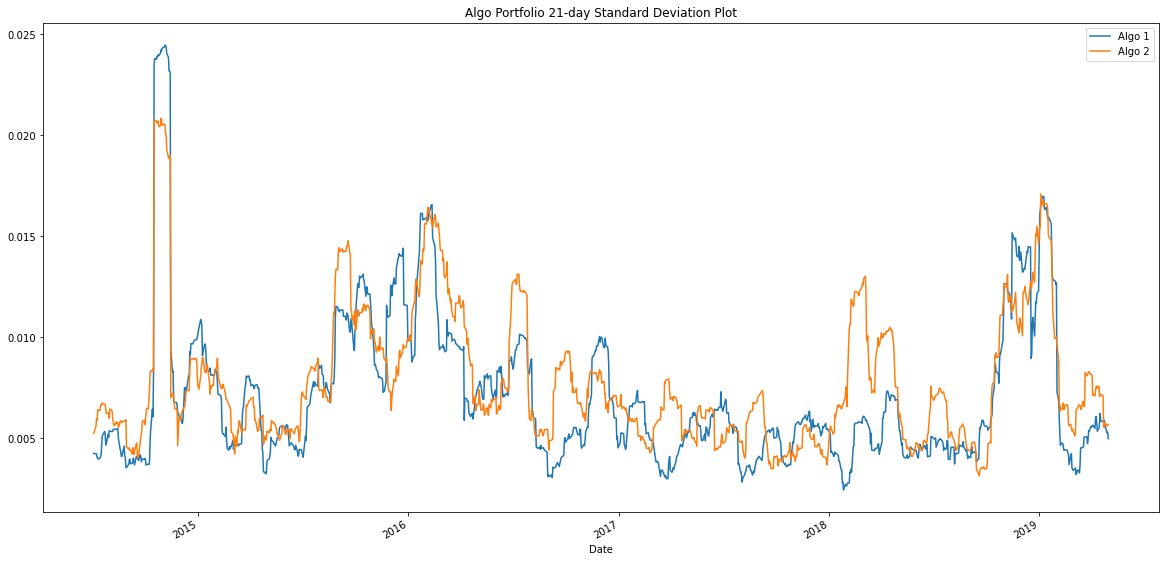

In [115]:
#plot Rolling std deviation for algo_df
algo_df_roll.plot(figsize=(20,10), title="Algo Portfolio 21-day Standard Deviation Plot")

In [116]:
#Rolling std deviation for sp_df_daily_returns
sp_df_roll = sp_df_daily_returns.rolling(window=21).std()
sp_df_roll

,S&P TSX 60
Date,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
...,...
2019-12-20,0.003366
2019-12-23,0.003298
2019-12-24,0.003216


<AxesSubplot:title={'center':'S&P TSX 60 21-day Standard Deviation Plot'}, xlabel='Date'>

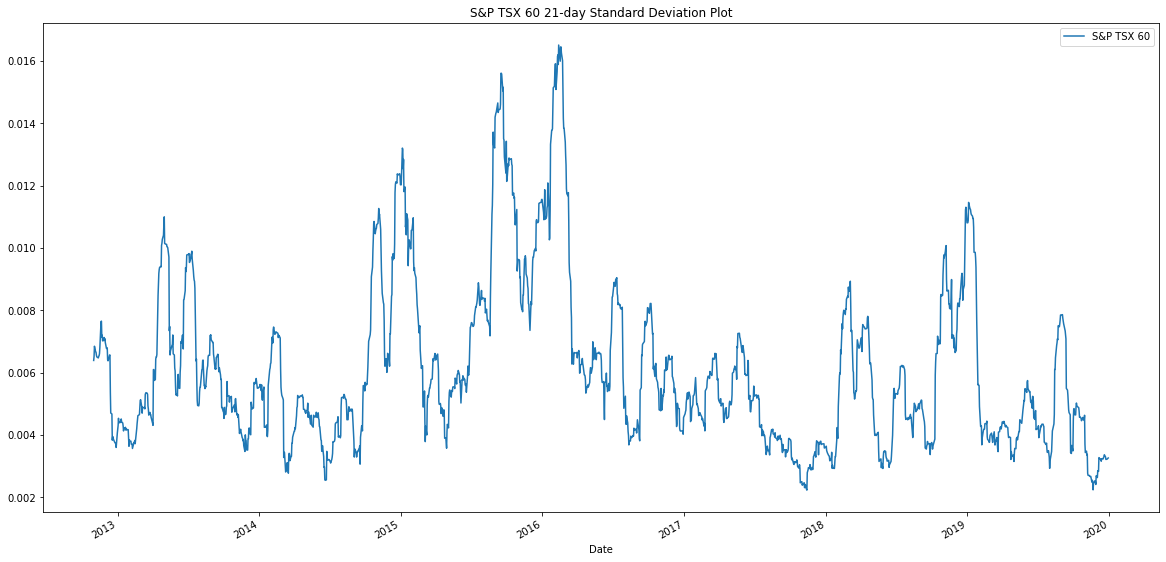

In [117]:
#plot Rolling std deviation for sp_df_daily_returns 
sp_df_roll.plot(figsize=(20,10), title="S&P TSX 60 21-day Standard Deviation Plot")

### Calculate and plot the correlation

In [118]:
# Calculate the correlation
co_rel = joined_daily_returns.corr()

# Display correlation matrix
co_rel

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

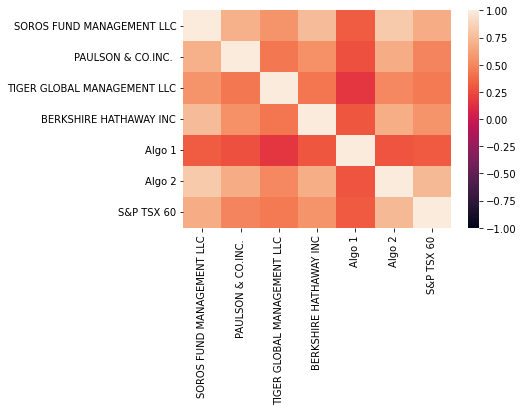

In [119]:
#correlation plot
sns.heatmap(co_rel, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [120]:
# Calculate covariance of a single portfolio
covar = joined_daily_returns['Algo 1'].cov(joined_daily_returns['S&P TSX 60'])
covar

1.6563000308911378e-05

In [121]:
# Calculate variance of S&P TSX
variance = joined_daily_returns['S&P TSX 60'].var()
variance

4.9479515915131015e-05

In [122]:
# Computing beta
sp_beta = covar / variance
sp_beta

0.33474459081856844

<AxesSubplot:xlabel='Date'>

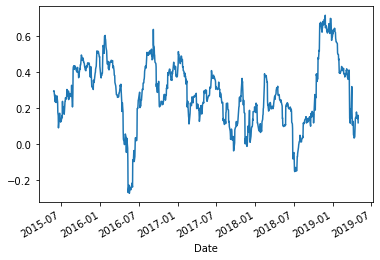

In [123]:
# Plot beta trend
covar = joined_daily_returns['Algo 1'].rolling(60).cov(joined_daily_returns['S&P TSX 60'])
variance = joined_daily_returns['S&P TSX 60'].rolling(60).var()
sp_beta = covar / variance
sp_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

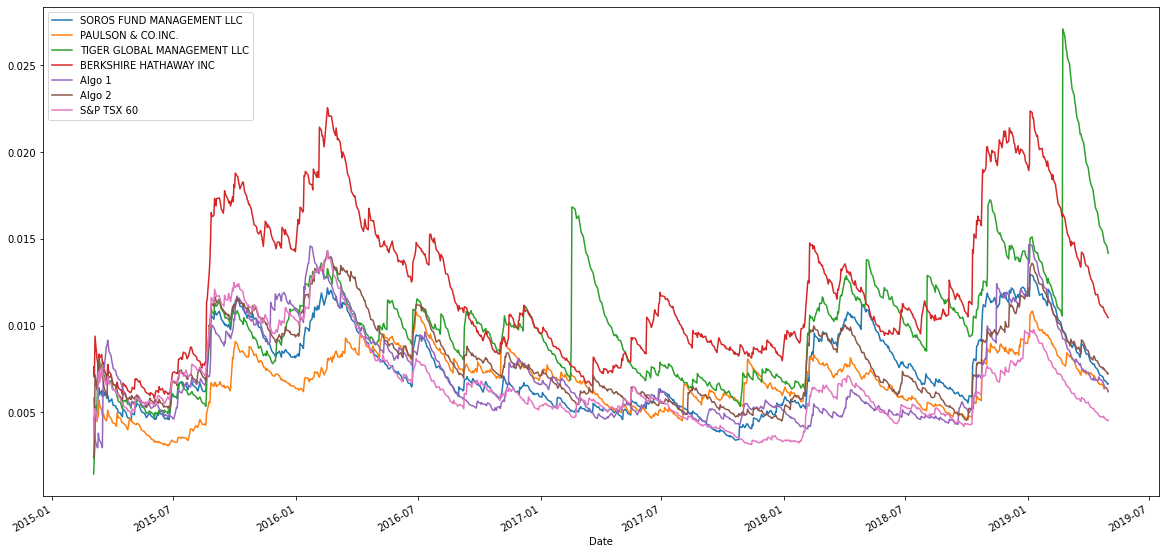

In [124]:
# Use `ewm` to calculate the rolling window
joined_daily_returns.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [125]:
# Annualized Sharpe Ratios
all_portfolio_std = joined_daily_returns.std()
sharpe_ratio = (joined_daily_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

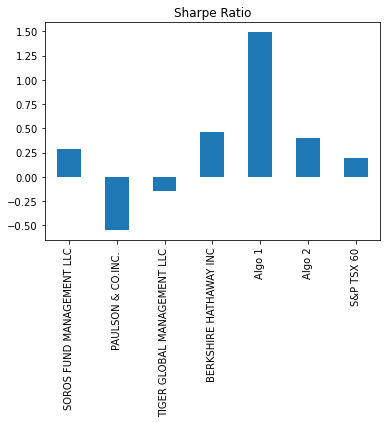

In [126]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title ="Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [127]:
# Reading data from 1st stock
l_csv_path = Path("Resources/l_historical.csv")
l_df = pd.read_csv(l_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [128]:
# Reading data from 2nd stock
otex_csv_path = Path("Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [129]:
# Reading data from 3rd stock
shop_csv_path = Path("Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [130]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([l_df, otex_df, shop_df], axis="rows", join="inner")
combined_df

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [132]:
# Reset Date index
combined_df.reset_index()

,Date,Symbol,Close
0,2018-01-02,L,57.99
1,2018-01-03,L,57.41
2,2018-01-04,L,57.42
3,2018-01-05,L,57.42
4,2018-01-08,L,56.86
...,...,...,...
1498,2019-12-20,SHOP,513.22
1499,2019-12-23,SHOP,511.62
1500,2019-12-24,SHOP,525.39
1501,2019-12-27,SHOP,534.76


In [133]:
# Reorganize portfolio data by having a column per symbol
combined_df = combined_df.pivot_table(values="Close", index="Date", columns="Symbol")
combined_df

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [134]:
# Calculate daily returns
daily_returns = combined_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [135]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [136]:
# Join your returns DataFrame to the original returns DataFrame
joined_daily_returns["Custom_Portfo"] = portfolio_returns

In [137]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_daily_returns = joined_daily_returns.dropna().copy()
joined_daily_returns 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom_Portfo
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [138]:
# Calculate the annualized `std`
annual_std = joined_daily_returns.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX 60                     0.099121
Custom_Portfo                  0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [139]:
# Calculate rolling standard deviation
joined_daily_returns_roll = joined_daily_returns.rolling(window=21).std()
joined_daily_returns_roll

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom_Portfo
Date,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.008253
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.008231
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.007718


<AxesSubplot:title={'center':'Joined Daily Returns 21-day Rolling Standard Deviation Plot'}, xlabel='Date'>

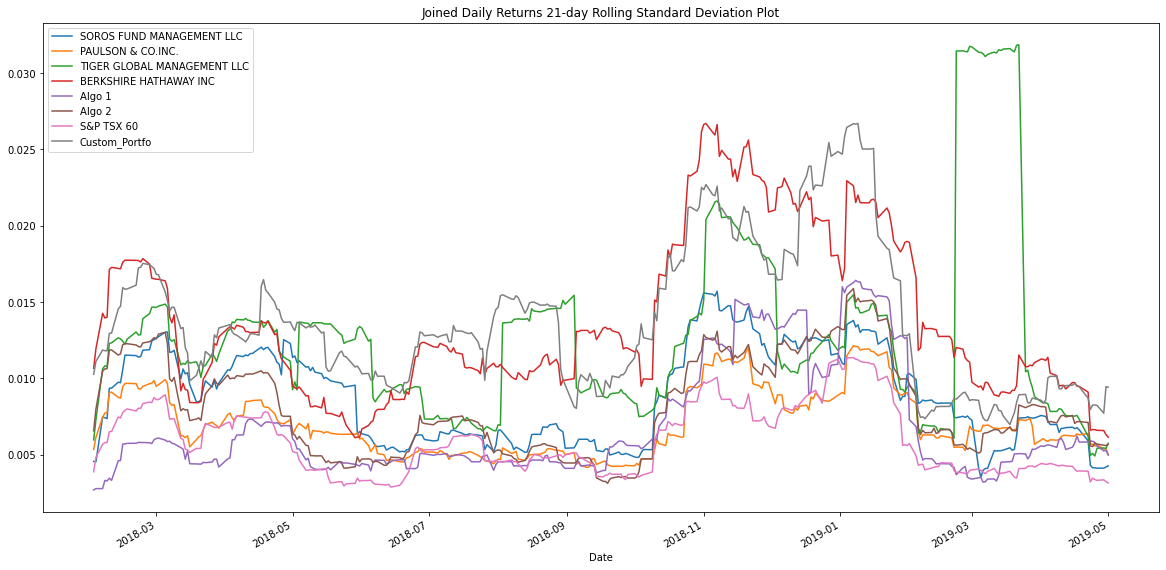

In [140]:
# Plot rolling standard deviation
joined_daily_returns_roll.plot(figsize=(20,10), title="Joined Daily Returns 21-day Rolling Standard Deviation Plot")

### Calculate and plot the correlation

In [141]:
# Calculate the correlation
co_rel = joined_daily_returns.corr()
co_rel

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom_Portfo
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P TSX 60,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
Custom_Portfo,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


<AxesSubplot:>

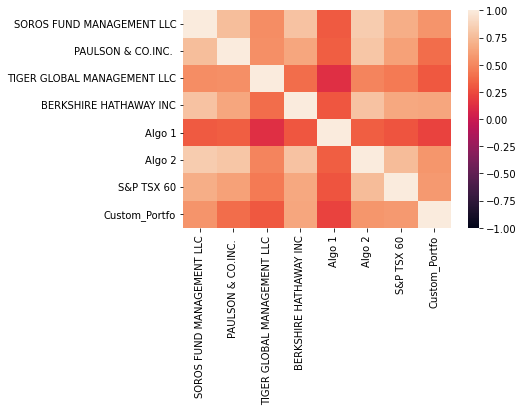

In [142]:
#plot the correlation
sns.heatmap(co_rel, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [143]:
# Calculate and plot Beta
# Caluclating Covariance
covar = joined_daily_returns['Custom_Portfo'].cov(joined_daily_returns['S&P TSX 60'])
covar

5.111305460230443e-05

In [144]:
# Calculate variance of S&P TSX
variance = joined_daily_returns['S&P TSX 60'].var()
variance

3.898788619333669e-05

In [145]:
#calc beta
beta_sp = covar / variance
beta_sp

1.3109983534075265

<AxesSubplot:xlabel='Date'>

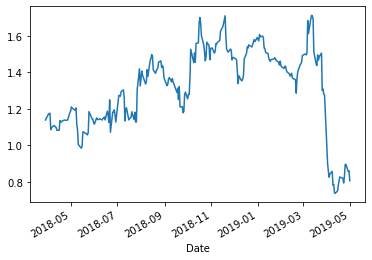

In [146]:
# Plot 60-day beta trend
covar = joined_daily_returns['Custom_Portfo'].rolling(60).cov(joined_daily_returns['S&P TSX 60'])
variance = joined_daily_returns['S&P TSX 60'].rolling(60).var()
sp_beta = covar / variance
sp_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [147]:
# Calculate Annualized Sharpe Ratios
all_portfolio_std = joined_daily_returns.std()
sharpe_ratio = (joined_daily_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
Custom_Portfo                  1.564547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio for All Portfolios'}>

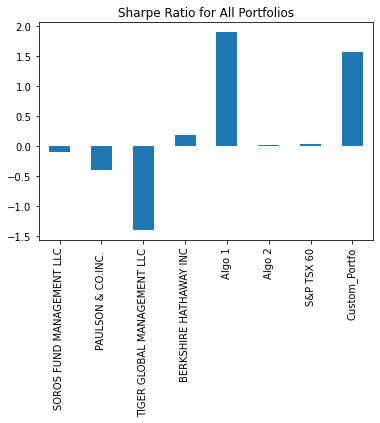

In [148]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title ="Sharpe Ratio for All Portfolios")

### How does your portfolio do?

Write your answer here!

In [74]:
### In terms of performance the custom_portfo is the second best after the algo 1